## Project description
The idea was to create a data base from the answers of a prepared survey. The overall goal of this
project is to understand and summarize the questionnaire answers; and eventually to extract major trends.
Our project is about Brain Drain in Tunisia. In this regard, a survey was conducted among Tunisian people in order to get answers of several questions about this topic. As a team, we are mainly interested in making analysis about two basic questions among all the questions being answered :
- What are the reasons that would push you to leave Tunisia ? (Question 4)
- Socially, what’s the difference between Tunisia and abroad in social life ? (Question 5)

This script concerns the work we will do about the answers of Question 4.

## Text Mining Project Pipeline
0. Read questionnaire data from csv file
1. Initialize raw corpus (for example, select Q4 and Q5 answers only)
2. Text cleaning (NLTK library)
3. Text representation using BOW-tfidf model (Scikit-learn library)
4. Topic modeling
5. Clustering
6. Predictive modeling
7. Visualization and interpretation of final results

Through this project, we use several python libraries. 
- Numpy is a library for scientific calculations in Python. 
- Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools.
- Matplotlib is a library for visualization data in the form of graphics.

In [1]:
import pandas as pd   # for DataFrames  -- resembles relational DB and SQL
import numpy as np    # for mathematical operations -- resembles Matlab 

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# set the font size of plots
plt.rcParams['font.size'] = 14

## 1) Read questionnaire data

In [3]:
# Read data from a CSV file : this will return a DataFrame object
df = pd.read_csv("C:/Users/MounaB/Desktop/Mastere TICV/Cours/Lecons/Text Mining/data.csv", sep=';',encoding='iso-8859-1')

In [4]:
df.shape #Dataframe dimension

(258, 16)

In [5]:
df.head()

,Timestamp,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,"Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire ""autre"" si vous ne l'avez pas)",Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?,Q2 : Quel salaire vous fera rester en Tunisie ?,Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?
0,10/30/2018 18:57:24,20-25,Femme,Célibataire,Ingénieur,INSAT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,student's order in the official list of TICV s...,"mes études, ma famille et mon entourage",2000,le tourisme,la volonté de faire de l'expérience et de fair...,A l'étranger on trouve plus de respect.,A l'étranger ils payent plus et ils sont plus ...
1,10/30/2018 22:33:57,20-25,Homme,Célibataire,Ingénieur,ENIT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,Autre,Rien,2000,Réputation,Niveau de conscience populaire,La valeur d homme,Recherche
2,10/31/2018 10:25:17,26-30,Femme,Célibataire,Mastère,ESAD,Fonctionnaire,Grand Tunis,Artistique,22,La mentalité,2000 dinars,la sécurité,l'argent,la tolérance,la motivation
3,10/31/2018 10:28:55,31 et plus,Homme,Marié,Licence,FST,Fonctionnaire,Grand Tunis,Sciences de l'Ingénieur,22,Qualité de vie,3500,"Pour un investisseur, la rémunération des empl...",L'expérience + le salaire,La mentalité sur le niveau professionnel et so...,"À l'étranger, les expériences sont plus intere..."
4,10/31/2018 10:29:24,20-25,Femme,Célibataire,Mastère,Faculté des Sciences Humaines et Sociales de T...,Fonctionnaire,Grand Tunis,Sciences humaines et sociales,22,Une bonne ambiance de travail,2000 dinars,"Les bonnes conditions climatiques, la convivia...",Des fourchettes salariales plus importantes et...,Une meilleure parité en matière de compétence,"T es payé pour ta compétence, les plafonds de ..."


In [6]:
df.columns # names of Dataframe columns

Index(['Timestamp', 'Votre âge', 'Sexe', 'Etat civil', 'Niveau d'étude',
       'Etablissement d'études', 'Situation professionnelle', 'Région',
       'Domaine d'études',
       'Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire "autre" si vous ne l'avez pas)',
       'Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?',
       'Q2 : Quel salaire vous fera rester en Tunisie ?',
       'Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?',
       'Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?',
       'Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?',
       'Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?'],
      dtype='object')

In [7]:
pd.DataFrame(df.iloc[:,13].value_counts().head()) # count numbers in each answer category

,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?
Tout,4
Travail,3
travailler,3
Les conditions de vie,2
La liberté,2


We note that the answer **Tout** has the most counts.

## 2) Prepare corpus for analyzing Q4

Terminology:
- Corpus = list of documents
- Document = string (sequence of characters)

In [8]:
Q4_corpus = df.iloc[:,13].tolist()

In [9]:
print(type(Q4_corpus))
print(type(Q4_corpus[0]))
print(len(Q4_corpus))     #number of documents in corpus
print(len(Q4_corpus[0]))  #number of characters in first document of corpus

<class 'list'>
<class 'str'>
258
59


### Visualize Distribution of Characters in Corpus

In [10]:
import re
from nltk import FreqDist
from tabulate import tabulate

In [11]:
Q4_chars_list = "\n".join(Q4_corpus)

In [12]:
print(type(Q4_chars_list))
print(len(Q4_chars_list))

<class 'str'>
12298


In [13]:
fdist4 = FreqDist([c for c in Q4_chars_list])

In [14]:
fdist4

FreqDist({' ': 1627, 'e': 1560, 'i': 838, 'a': 748, 'n': 733, 't': 698, 'r': 687, 's': 685, 'l': 573, 'o': 565, ...})

We note that the word **"vie"** was used 61 times and it's the most frequented.

In [15]:
print("number of characters:" + str(fdist4.N()))
print("number of unique characters:" + str(fdist4.B()))

number of characters:12298
number of unique characters:69


In [16]:
print('List of unique characters in the corpus:')
print(list(fdist4.keys()))
len(list(fdist4.keys()))

List of unique characters in the corpus:
['l', 'a', ' ', 'v', 'o', 'n', 't', 'é', 'd', 'e', 'f', 'i', 'r', "'", 'x', 'p', 'c', 'g', '\n', 'N', 'u', 's', 'L', '+', 'D', 'h', 'm', 'è', ',', 'b', 'q', 'j', 'T', '.', 'M', 'U', 'y', 'k', 'w', 'O', '-', 'S', 'Q', 'E', 'V', 'R', 'ê', 'z', 'I', 'A', '/', 'à', 'É', 'P', '(', ')', 'ù', 'î', 'F', '!', '4', '5', 'C', ';', 'B', 'J', 'ô', 'Y', 'G']


69

We note that there are 69 unique caracters in the corpus.

In [17]:
# strange characters
for c in ['ù', 'û', 'ô', 'â', 'î', 'ê', 'É']:
    print(c,fdist4[c])

ù 2
û 0
ô 2
â 0
î 1
ê 7
É 4


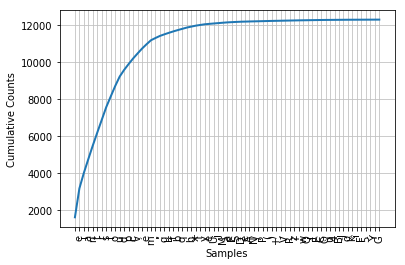

In [18]:
fdist4.plot(cumulative=True)

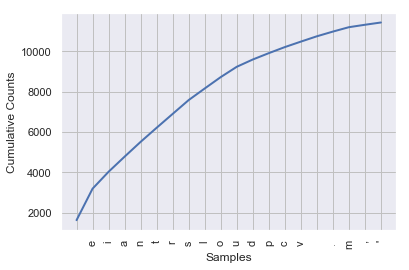

In [25]:
fdist4.plot(20,cumulative=True)

We note that the top 20 characters cover more than 95% of all character occurrences in the corpus. As we can notice there are characters like this symbol **" ' "** that should be removed. We will do such a task later in the step of cleaning. 

In [26]:
# the 10 most frequent characters in the corpus
fdist4.most_common(10)

[(' ', 1627),
 ('e', 1560),
 ('i', 838),
 ('a', 748),
 ('n', 733),
 ('t', 698),
 ('r', 687),
 ('s', 685),
 ('l', 573),
 ('o', 565)]

In [27]:
# the 20 most frequent characters in the corpus
u = pd.DataFrame(fdist4.most_common(20))
u.columns = ['character', 'frequency']
u

,character,frequency
0,,1627
1,e,1560
2,i,838
3,a,748
4,n,733
5,t,698
6,r,687
7,s,685
8,l,573
9,o,565


## 3) Data Cleaning using NLTK

The Pipeline:
1. Language identification
2. Remove useless characters
3. Convert to lowercase
4. Tokenization
5. Stemming

### Language identification
Our corpus contains answers in multiple languages. We will only select answers in French.

In [19]:
# Load library module for language identification
from nltk.classify.textcat import TextCat

# You will have to download some resources the first time that you use this library
import nltk #The Natural Language Toolkit is a suite of libraries and programs for symbolic and statistical natural 
#language processing (NLP) for texts
nltk.download('crubadan')
nltk.download('punkt')

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\MounaB\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MounaB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# create class instance
import regex
tc = TextCat()

In [21]:
# quick test on first document in corpus
print(Q4_corpus[0])
print(tc.guess_language(Q4_corpus[0]))

la volonté de faire de l'expérience et de faire de l'argent
fra


**"fra"** shows that the first document is expressed in French language.

In [22]:
# now run langid on the entire corpus
# THIS COMMAND WILL TAKE A RELATIVELY LONG TIME (~ 1 MINUTE)
res = [tc.guess_language(doc) for doc in Q4_corpus]

In [23]:
type(res)

list

In [24]:
len(res)

258

In [25]:
pd.Series(res).value_counts()

fra     206
lld       7
eng       7
rcf       5
nap       3
eng       3
ita       3
fur       3
deu       3
gsw       2
bug       2
epo       1
ssw       1
cat       1
ltz       1
ces       1
pih       1
bre       1
vec       1
lms       1
pcm       1
src       1
lnc       1
por       1
kua       1
dtype: int64

**206** documents are expressed in French language.

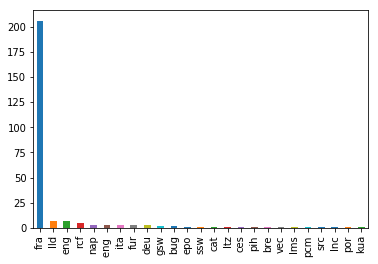

In [26]:
pd.Series(res).value_counts().plot(kind='bar')

The highest bar shows that most of documents are expressed in French language.

In [27]:
# Display documents classified as FRENCH
[(res[i],doc) for i,doc in enumerate(Q4_corpus) if res[i] == 'fra']

[('fra', "la volonté de faire de l'expérience et de faire de l'argent"),
 ('fra', 'Niveau de conscience populaire'),
 ('fra', "L'expérience + le salaire"),
 ('fra',
  'Des fourchettes salariales plus importantes et des privilèges au travail, stabilité financière'),
 ('fra', 'une nouvelle expérience et opportunité'),
 ('fra', "L'argent et la stabilité"),
 ('fra',
  "le manque d'opportunités et d'environnement épanouissant , le salaire dérisoire que je toucherai en Tunisie."),
 ('fra', 'Un bon poste dans un joli pays'),
 ('fra', "plus d'opportunités inexistantesen Tunisie."),
 ('fra',
  "La possibilité d'avoir une carrière internationale et la presence de spécialité et de compétence abscente en Tunisie"),
 ('fra', "Les codes d'étiques"),
 ('fra',
  'prospecter des marchés internationaux pour mes futurs produits ou services'),
 ('fra', 'Organisation, éthique, respect'),
 ('fra', 'les opportunités de travail'),
 ('fra',
  'La situation économique et politique non stable du pays La corrupti

In [28]:
# Display documents NOT classified as FRENCH
Q4_corpus_fr1 = [(res[i],doc) for i,doc in enumerate(Q4_corpus) if res[i] != 'fra']

In [29]:
# a quick heuristic method for removing non-French documents from corpus
Q4_corpus_fr = [doc for i,doc in enumerate(Q4_corpus) if res[i] != 'eng']

1) Here we dispaly a method to quickly select French documents only.

In [30]:
Q4_corpus_fr2 = [doc for i,doc in enumerate(Q4_corpus) if res[i] == 'fra']

2) We can also manually remove or translate documents in other languages (Tunisian dialect, english)

3) There is a third method by using the goslate library that hepls to translate documents.

In [31]:
#Select all non French documents 
Q4_corpus_fr2 = [doc for i,doc in enumerate(Q4_corpus) if res[i] != 'fra']

In [32]:
import goslate
gs = goslate.Goslate()
#[gs.translate(x, "fr") for x in Q4_corpus_fr2]

In [33]:
doc_filter_1 = [res[i] != 'eng' for i,doc in enumerate(Q4_corpus)]
assert(np.sum(doc_filter_1) == len(Q4_corpus_fr))
doc_filter_1[0:5]

[True, True, True, True, True]

In [34]:
# make sure the new corpus is a list of strings
type(Q4_corpus_fr),type(Q4_corpus_fr[0])

(list, str)

In [35]:
len(Q4_corpus_fr)   # number of documents in the corpus

251

### Remove non-word characters + Convert to lowercase + Tokenize

In [36]:
# This tokenization method throws away all non-word characters (word characters = letters, digits, _ )
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[^_\W]+')

In [37]:
# convert to lowercase and tokenize
# Remark: the right side of this expression is called a COMPREHENSION - it's a quick way of creating a list in Python
Q4_corpus_fr_words = [tokenizer.tokenize(doc.lower()) for doc in Q4_corpus_fr]

In [38]:
# make sure the new corpus is a list of lists of strings
type(Q4_corpus_fr_words),type(Q4_corpus_fr_words[0]),type(Q4_corpus_fr_words[0][0])

(list, list, str)

In [39]:
len(Q4_corpus_fr_words)    # number of documents in the new corpus

251

In [40]:
Q4_corpus_fr_words[0]      # first document in the new corpus

['la',
 'volonté',
 'de',
 'faire',
 'de',
 'l',
 'expérience',
 'et',
 'de',
 'faire',
 'de',
 'l',
 'argent']

### Remove stopwords
We will use NLTK's default list of stop worsd for the French language.

In [41]:
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MounaB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Load stop words
stop_words_fr = stopwords.words('french')

In [43]:
print(type(stop_words_fr))
print(len(stop_words_fr))

<class 'list'>
155


In [44]:
# Show some stop words
stop_words_fr[:10]

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [45]:
# we can also add an entire list of words
stop_words_fr = stop_words_fr + ['les','être','avoir','parce','où','si','chaque','donc','dont','encore','faut','quand','tant','tel','tout','va','vient','peut','veut']

In [46]:
# Remove stop words from our corpus
Q4_corpus_fr_words_2 = [[word for word in doc  if word not in stop_words_fr] for doc in Q4_corpus_fr_words]
Q4_corpus_fr_words_2

[['volonté', 'faire', 'expérience', 'faire', 'argent'],
 ['niveau', 'conscience', 'populaire'],
 ['argent'],
 ['expérience', 'salaire'],
 ['fourchettes',
  'salariales',
  'plus',
  'importantes',
  'privilèges',
  'travail',
  'stabilité',
  'financière'],
 ['nouvelle', 'expérience', 'opportunité'],
 ['argent', 'stabilité'],
 ['manque',
  'opportunités',
  'environnement',
  'épanouissant',
  'salaire',
  'dérisoire',
  'toucherai',
  'tunisie'],
 ['mode', 'vie', 'quotidienne'],
 ['bon', 'poste', 'joli', 'pays'],
 ['plus', 'opportunités', 'inexistantesen', 'tunisie'],
 [],
 ['possibilité',
  'carrière',
  'internationale',
  'presence',
  'spécialité',
  'compétence',
  'abscente',
  'tunisie'],
 ['codes', 'étiques'],
 ['prospecter', 'marchés', 'internationaux', 'futurs', 'produits', 'services'],
 ['organisation', 'éthique', 'respect'],
 ['opportunités', 'travail'],
 ['salaire'],
 ['situation',
  'économique',
  'politique',
  'non',
  'stable',
  'pays',
  'corruption'],
 ['contrat',

In [47]:
#We notice that there is still stop words so we remove them manually 
stop_words_fr = stop_words_fr + ['ils','leurs','it','chez','meme','a','etc','4','5','aussi','lez','car','jusqu','mo','e']
Q4_corpus_fr_words_2 = [[word for word in doc  if word not in stop_words_fr] for doc in Q4_corpus_fr_words]

In [48]:
# make sure the new corpus is a list of lists of strings
type(Q4_corpus_fr_words_2),type(Q4_corpus_fr_words_2[0]),type(Q4_corpus_fr_words_2[0][0])

(list, list, str)

In [49]:
len(Q4_corpus_fr_words_2)   # number of documents in the new corpus

251

In [50]:
Q4_corpus_fr_words_2[0]  # the first document in the new corpus

['volonté', 'faire', 'expérience', 'faire', 'argent']

In [51]:
# display the new corpus (AFTER removing stop words)
Q4_corpus_fr_words_2

[['volonté', 'faire', 'expérience', 'faire', 'argent'],
 ['niveau', 'conscience', 'populaire'],
 ['argent'],
 ['expérience', 'salaire'],
 ['fourchettes',
  'salariales',
  'plus',
  'importantes',
  'privilèges',
  'travail',
  'stabilité',
  'financière'],
 ['nouvelle', 'expérience', 'opportunité'],
 ['argent', 'stabilité'],
 ['manque',
  'opportunités',
  'environnement',
  'épanouissant',
  'salaire',
  'dérisoire',
  'toucherai',
  'tunisie'],
 ['mode', 'vie', 'quotidienne'],
 ['bon', 'poste', 'joli', 'pays'],
 ['plus', 'opportunités', 'inexistantesen', 'tunisie'],
 [],
 ['possibilité',
  'carrière',
  'internationale',
  'presence',
  'spécialité',
  'compétence',
  'abscente',
  'tunisie'],
 ['codes', 'étiques'],
 ['prospecter', 'marchés', 'internationaux', 'futurs', 'produits', 'services'],
 ['organisation', 'éthique', 'respect'],
 ['opportunités', 'travail'],
 ['salaire'],
 ['situation',
  'économique',
  'politique',
  'non',
  'stable',
  'pays',
  'corruption'],
 ['contrat',

### Visualize distribution of word lengths
This is useful for getting ideas about stemming approach (in the next step) ...

In [52]:
# create list of all words in corpus
words = {word for doc in Q4_corpus_fr_words_2 for word in doc}
type(words),len(words)

(set, 463)

In [53]:
S = pd.Series([len(word) for word in words])

In [54]:
S.describe()

count    463.000000
mean       7.930886
std        2.653018
min        3.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       17.000000
dtype: float64

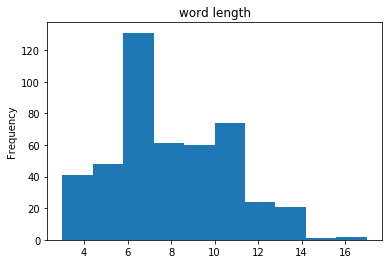

In [55]:
fig = S.plot(kind='hist', title="word length")

In [56]:
# which words have length <= 2
[word for word in words if len(word)<=2]

[]

In [57]:
# words that contain more than 10 charcters
[word for word in words if len(word)>=13]

['professionnelle',
 'exceptionnelle',
 'épanouissement',
 'multinationale',
 'comportements',
 'infrastructure',
 'internationaux',
 'connaissances',
 'principalement',
 'reconnaissance',
 'professionnels',
 'inexistantesen',
 'technologique',
 'environnement',
 'professionnel',
 'collaborateurs',
 'professionnelles',
 'développement',
 'administration',
 'apprentissage',
 'internationale',
 'technologiques',
 'professionnalisme',
 'intéressantes']

### Word normalization

In [58]:
from nltk.stem.snowball import FrenchStemmer

In [59]:
# Stemming method 1: Snowball method from NLTK
stemmer = FrenchStemmer()
Q4_corpus_fr_words_3_1 = [[stemmer.stem(word) for word in doc] for doc in Q4_corpus_fr_words_2]

In [60]:
# test this method on a few words just to see how it works
print(stemmer.stem('engagement'))
print(stemmer.stem('gouvernement'))
print(stemmer.stem('payer'))
print(stemmer.stem('pays'))

engag
gouvern
pai
pay


In [61]:
## Stemming method 2 : Dr. Chiraz's quick hack!
# step1: remove s at the end of the word if the word contains at least 6 characters
temp = [[word[0:len(word)-1] if (len(word)>=6 and word.endswith('s')) else word for word in doc] for doc in Q4_corpus_fr_words_2]
# step2: keep only the first 7 characters of the word
Q4_corpus_fr_words_3_2 = [[word[0:7] for word in doc] for doc in temp]

In [62]:
Q4_corpus_fr_words_2[0:5]

[['volonté', 'faire', 'expérience', 'faire', 'argent'],
 ['niveau', 'conscience', 'populaire'],
 ['argent'],
 ['expérience', 'salaire'],
 ['fourchettes',
  'salariales',
  'plus',
  'importantes',
  'privilèges',
  'travail',
  'stabilité',
  'financière']]

In [63]:
Q4_corpus_fr_words_3_1[0:5]

[['volont', 'fair', 'expérient', 'fair', 'argent'],
 ['niveau', 'conscienc', 'populair'],
 ['argent'],
 ['expérient', 'salair'],
 ['fourchet',
  'salarial',
  'plus',
  'import',
  'privileg',
  'travail',
  'stabl',
  'financi']]

In [64]:
Q4_corpus_fr_words_3_2[0:5]

[['volonté', 'faire', 'expérie', 'faire', 'argent'],
 ['niveau', 'conscie', 'populai'],
 ['argent'],
 ['expérie', 'salaire'],
 ['fourche',
  'salaria',
  'plus',
  'importa',
  'privilè',
  'travail',
  'stabili',
  'financi']]

In [65]:
len(Q4_corpus_fr_words_3_2)

251

### Visualize distribution of document lengths
Length of document = number of words in document.

This is useful for verifying the results of text cleaning and getting a general idea about the corpus.

In [66]:
# create list containing the number of words in each document
L = [len(doc) for doc in Q4_corpus_fr_words_2]

In [67]:
pd.Series(L).describe()

count    251.000000
mean       4.227092
std        3.665000
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       25.000000
dtype: float64

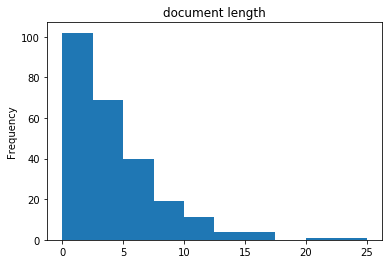

In [68]:
# frequency distribution of document lengths as a histogram
u = pd.Series(L).plot(kind='hist', title='document length')

In [69]:
# frequency distribution of document lengths as a table
pd.Series(L).value_counts().head(7)

2    58
3    47
1    40
4    22
6    17
5    13
8    10
dtype: int64

In [70]:
# Display dcuments that contain only one word
pd.Series([' '.join(doc) for doc in Q4_corpus_fr_words_2 if len(doc)==1]).value_counts().head(10)

travail       5
salaire       4
argent        4
travailler    4
liberté       3
expérience    2
etudes        1
life          1
vacances      1
ambition      1
dtype: int64

In [71]:
# Display documents that contain 2 words
pd.Series([' '.join(doc) for doc in Q4_corpus_fr_words_2 if len(doc)==2]).value_counts().head(10)

conditions vie             3
mode vie                   3
qualité vie                2
niveau vie                 2
opportunité travail        1
meilleures opportunités    1
tourisme travail           1
chances travail            1
codes étiques              1
bonne formation            1
dtype: int64

In [72]:
# Display documents that contain 3 words
pd.Series([' '.join(doc) for doc in Q4_corpus_fr_words_2 if len(doc)==3]).value_counts().head(10)

salaire mode vie                      2
meilleures conditions études          1
salaire niveau vie                    1
niveau vie salaire                    1
salaires bas surtout                  1
opportunity respect infrastructure    1
meilleure vie salaire                 1
avantages toutes sortes               1
évoluer plan académique               1
pense recherche opportunité           1
dtype: int64

### Visualize Distribution of Words
Just want to get an idea about the most frequently occurring words in the corpus. This is useful for verifying the results of text cleaning and getting a general idea about corpus content.

We use the ``FreqDist`` module from NLTK to obtain the frequency distribution of words of a given corpus.

In [73]:
# we will compare the distribution of words of the following three different corpora.
fdist2 = FreqDist([c for c in [word for doc in Q4_corpus_fr_words_2 for word in doc]])
fdist3 = FreqDist([c for c in [word for doc in Q4_corpus_fr_words_3_1 for word in doc]])
fdist4 = FreqDist([c for c in [word for doc in Q4_corpus_fr_words_3_2 for word in doc]])

In [74]:
# total number of words in this corpus
fdist2.N(),fdist3.N(),fdist4.N()

(1061, 1061, 1061)

In [75]:
# number of UNIQUE words in this corpus
fdist2.B(),fdist3.B(),fdist4.B()

(463, 388, 394)

In [76]:
# 10 most frequent words in this corpus
fdist2.most_common(20)

[('vie', 61),
 ('salaire', 49),
 ('travail', 38),
 ('plus', 27),
 ('niveau', 20),
 ('expérience', 18),
 ('tunisie', 18),
 ('respect', 17),
 ('conditions', 17),
 ('opportunités', 15),
 ('opportunité', 13),
 ('argent', 12),
 ('mode', 12),
 ('meilleure', 12),
 ('manque', 11),
 ('bon', 11),
 ('meilleur', 11),
 ('gens', 10),
 ('qualité', 9),
 ('étranger', 9)]

In [77]:
fdist3.most_common(20)

[('vi', 61),
 ('salair', 51),
 ('travail', 38),
 ('opportun', 28),
 ('plus', 27),
 ('meilleur', 25),
 ('niveau', 21),
 ('condit', 20),
 ('expérient', 19),
 ('respect', 19),
 ('tunis', 18),
 ('bon', 18),
 ('argent', 12),
 ('mod', 12),
 ('manqu', 11),
 ('qualit', 11),
 ('nouvel', 10),
 ('gen', 10),
 ('travaill', 10),
 ('étud', 9)]

In [78]:
fdist4.most_common(20)

[('vie', 61),
 ('salaire', 51),
 ('travail', 48),
 ('opportu', 29),
 ('plus', 27),
 ('meilleu', 25),
 ('niveau', 20),
 ('respect', 20),
 ('conditi', 20),
 ('expérie', 19),
 ('tunisie', 19),
 ('argent', 12),
 ('mode', 12),
 ('manque', 11),
 ('bon', 11),
 ('mentali', 11),
 ('nouvell', 10),
 ('gens', 10),
 ('profess', 10),
 ('étude', 9)]

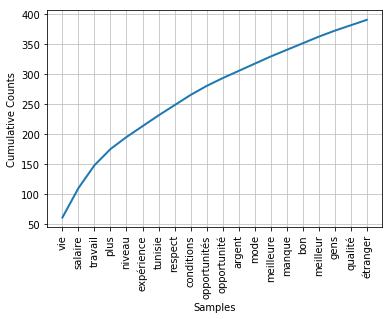

In [79]:
# cumulative frequency distribution of top 20 words in this corpus
fdist2.plot(20,cumulative=True)

## 4) Document representation with BOW-tfidf version

- Input: clean corpus
- Output: DTM matrix and vocabulary

In [80]:
# setup the cleaned corpus
Q4_corpus_fr_clean = [' '.join(doc) for doc in Q4_corpus_fr_words_3_2]
type(Q4_corpus_fr_clean),type(Q4_corpus_fr_clean[0]), len(Q4_corpus_fr_clean)

(list, str, 251)

In [81]:
# First Configuration parameters of the BOW model
max_words = 50
maxdf = 0.9 #When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
mindf = 2 #When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold

In [82]:
?CountVectorizer

Object `CountVectorizer` not found.


In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
tf_bow_model = CountVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr)

In [85]:
tf_bow_model.fit(Q4_corpus_fr_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=50, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...ls', 'leurs', 'it', 'chez', 'meme', 'a', 'etc', '4', '5', 'aussi', 'lez', 'car', 'jusqu', 'mo', 'e'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [86]:
## verify the vocabulary (remember that each feature corresponds to one vocabulary word)
tf_bow_vocab = tf_bow_model.get_feature_names()
print(type(tf_bow_vocab))
print(len(tf_bow_vocab))
print(tf_bow_vocab)

<class 'list'>
50
['amélior', 'argent', 'autre', 'bon', 'bonne', 'carrièr', 'comport', 'compéte', 'conditi', 'culture', 'domaine', 'découvr', 'dévelop', 'emploi', 'environ', 'expérie', 'faire', 'financi', 'gens', 'liberté', 'manque', 'mauvais', 'meilleu', 'mentali', 'mode', 'moyen', 'niveau', 'non', 'nouvell', 'offre', 'opportu', 'pays', 'personn', 'plus', 'profess', 'qualité', 'recherc', 'respect', 'salaire', 'situati', 'sociale', 'surtout', 'sécurit', 'travail', 'tunisie', 'vie', 'vivre', 'économi', 'étrange', 'étude']


In [87]:
# Terms that were ignored because they either:
#      - occurred in too many documents (`max_df`)
#      - occurred in too few documents (`min_df`)
#      - were cut off by feature selection (`max_features`).

tf_bow_model.stop_words_

{'abscent',
 'absence',
 'académi',
 'accepta',
 'acquisi',
 'acquéri',
 'activit',
 'actuell',
 'adaptee',
 'adapté',
 'adminis',
 'adéquat',
 'affaire',
 'agrandi',
 'agreabl',
 'ailleur',
 'aisance',
 'ajoutée',
 'amazon',
 'ambitio',
 'année',
 'ans',
 'apprend',
 'apprent',
 'approfo',
 'appréci',
 'après',
 'argebt',
 'assidui',
 'atteind',
 'ausi',
 'autrui',
 'avancem',
 'avancer',
 'avantag',
 'avenir',
 'aventur',
 'baisse',
 'bas',
 'beaucou',
 'belle',
 'bien',
 'bons',
 'boulot',
 'cadre',
 'capable',
 'capital',
 'cas',
 'certain',
 'challen',
 'chance',
 'changer',
 'cherche',
 'choix',
 'chute',
 'chômage',
 'civilis',
 'claire',
 'codes',
 'collabo',
 'collègu',
 'compri',
 'comun',
 'concord',
 'confian',
 'confort',
 'connais',
 'connait',
 'conscie',
 'contrat',
 'corrupt',
 'courage',
 'coutume',
 'crise',
 'créativ',
 'crédibl',
 'curiosi',
 'côtoyer',
 'debut',
 'decouve',
 'depui',
 'dignité',
 'dinar',
 'discipl',
 'disponi',
 'diversi',
 'dominan',
 'donner',


In [88]:
# Second Configuration parameters of the BOW model
max_words = 1061 #This is the total number of words in the corpus
maxdf = 0.9 #When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
mindf = 2 #When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold

In [89]:
tf_bow_model = CountVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr)
tf_bow_model.fit(Q4_corpus_fr_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1061, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...ls', 'leurs', 'it', 'chez', 'meme', 'a', 'etc', '4', '5', 'aussi', 'lez', 'car', 'jusqu', 'mo', 'e'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [90]:
## verify the vocabulary (remember that each feature corresponds to one vocabulary word)
tf_bow_vocab = tf_bow_model.get_feature_names()
print(type(tf_bow_vocab))
print(len(tf_bow_vocab))
print(tf_bow_vocab)

<class 'list'>
133
['acquéri', 'activit', 'ambitio', 'amélior', 'année', 'appréci', 'argent', 'autre', 'avenir', 'bas', 'beaucou', 'bien', 'bon', 'bonne', 'boulot', 'cadre', 'carrièr', 'certain', 'challen', 'comport', 'compri', 'compéte', 'conditi', 'confort', 'conscie', 'contrat', 'culture', 'dignité', 'discipl', 'diversi', 'domaine', 'droit', 'découvr', 'dévelop', 'emploi', 'entrepr', 'environ', 'etude', 'experie', 'explore', 'expérie', 'faire', 'fait', 'favorab', 'financi', 'fois', 'formati', 'futur', 'gens', 'grand', 'homme', 'importa', 'ingénie', 'interna', 'intéres', 'liberté', 'mal', 'manque', 'mauvai', 'mauvais', 'meilleu', 'mentali', 'mieux', 'mode', 'moins', 'monde', 'motivan', 'motivat', 'moyen', 'niveau', 'non', 'nouveau', 'nouvell', 'objecti', 'offre', 'opportu', 'organis', 'pays', 'personn', 'plus', 'politiq', 'possibi', 'poste', 'pourrie', 'poursui', 'privilè', 'profess', 'progrè', 'projet', 'qualite', 'qualité', 'quotidi', 'recherc', 'reconna', 'reconnu', 'respect', 'ré

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
# create instance of class, we decide to work with the second configuration of parameters
tfidf_model = TfidfVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr, use_idf = True)

# call fit() method in order to prepare BOW method (determine cabulary and IDF values)
tfidf_model.fit(Q4_corpus_fr_clean)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1061, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...ls', 'leurs', 'it', 'chez', 'meme', 'a', 'etc', '4', '5', 'aussi', 'lez', 'car', 'jusqu', 'mo', 'e'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [93]:
## verify the vocabulary
## Remember that each feature corresponds to one vocabulary word
tfidf_vocab = tfidf_model.get_feature_names()
print(len(tfidf_vocab))
print(tfidf_vocab)

133
['acquéri', 'activit', 'ambitio', 'amélior', 'année', 'appréci', 'argent', 'autre', 'avenir', 'bas', 'beaucou', 'bien', 'bon', 'bonne', 'boulot', 'cadre', 'carrièr', 'certain', 'challen', 'comport', 'compri', 'compéte', 'conditi', 'confort', 'conscie', 'contrat', 'culture', 'dignité', 'discipl', 'diversi', 'domaine', 'droit', 'découvr', 'dévelop', 'emploi', 'entrepr', 'environ', 'etude', 'experie', 'explore', 'expérie', 'faire', 'fait', 'favorab', 'financi', 'fois', 'formati', 'futur', 'gens', 'grand', 'homme', 'importa', 'ingénie', 'interna', 'intéres', 'liberté', 'mal', 'manque', 'mauvai', 'mauvais', 'meilleu', 'mentali', 'mieux', 'mode', 'moins', 'monde', 'motivan', 'motivat', 'moyen', 'niveau', 'non', 'nouveau', 'nouvell', 'objecti', 'offre', 'opportu', 'organis', 'pays', 'personn', 'plus', 'politiq', 'possibi', 'poste', 'pourrie', 'poursui', 'privilè', 'profess', 'progrè', 'projet', 'qualite', 'qualité', 'quotidi', 'recherc', 'reconna', 'reconnu', 'respect', 'rémunér', 'réseau

In [94]:
# Sort vocabulary words in ASCENDING order of IDF value (from most frequent to least frequent)
pd.DataFrame(dict(Word=tfidf_vocab,IDF=tfidf_model.idf_)).sort_values("IDF", inplace=False, ascending = True).head(10)

,Word,IDF
122,vie,2.435085
98,salaire,2.578185
117,travail,2.679281
75,opportu,3.162133
60,meilleu,3.351375
79,plus,3.438387
69,niveau,3.484907
95,respect,3.484907
22,conditi,3.484907
120,tunisie,3.533697


In [95]:
# compare vocabularies of TF model and TFIDF model
set(tfidf_vocab) - set(tf_bow_vocab)

set()

In [96]:
# Calculate DTM of our corpus
tfidf_dtm = tfidf_model.transform(Q4_corpus_fr_clean)

In [97]:
# Verify the type and size of this matrix
print(type(tfidf_dtm))
print(tfidf_dtm.shape)
# Number of non-zero values in this matrix
print(tfidf_dtm.nnz)

<class 'scipy.sparse.csr.csr_matrix'>
(251, 133)
772


In [98]:
# How many vocabulary terms are there in every document?
nb_terms_per_doc = np.array((tfidf_dtm>0).sum(axis=1))
print(type(nb_terms_per_doc))
print(nb_terms_per_doc.shape)
print(nb_terms_per_doc[0:10,0])

<class 'numpy.ndarray'>
(251, 1)
[4 2 1 2 7 3 2 6 3 3]


In [99]:
# In how many documents does each vocabulary term occur? -- Called the (absolute) document frequency (DF) of a term.
doc_freq = np.array((tfidf_dtm>0).sum(axis=0))
print(type(doc_freq))
print(doc_freq.shape)
print(doc_freq[0,0:10])

<class 'numpy.ndarray'>
(1, 133)
[ 2  2  2  4  2  2 12  4  2  2]


In [100]:
  # relative frequency i.e. proportion
rel_doc_freq = doc_freq / tfidf_dtm.shape[0]
print(type(rel_doc_freq))
print(rel_doc_freq.shape)
print(rel_doc_freq[0,0:5])

<class 'numpy.ndarray'>
(1, 133)
[0.00796813 0.00796813 0.00796813 0.01593625 0.00796813]


In [101]:
# put results in a data frame for easy visualization
u = pd.DataFrame(dict(word=tfidf_model.get_feature_names(),IDF=tfidf_model.idf_, df = doc_freq.ravel(), rel_df = rel_doc_freq.ravel()))
u

,word,IDF,df,rel_df
0,acquéri,5.430817,2,0.007968
1,activit,5.430817,2,0.007968
2,ambitio,5.430817,2,0.007968
3,amélior,4.919991,4,0.015936
4,année,5.430817,2,0.007968
5,appréci,5.430817,2,0.007968
6,argent,3.964480,12,0.047809
7,autre,4.919991,4,0.015936
8,avenir,5.430817,2,0.007968
9,bas,5.430817,2,0.007968


In [102]:
u.sort_values("IDF", inplace=False, ascending = True).head()

,word,IDF,df,rel_df
122,vie,2.435085,59,0.235060
98,salaire,2.578185,51,0.203187
117,travail,2.679281,46,0.183267
75,opportu,3.162133,28,0.111554
60,meilleu,3.351375,23,0.091633


### Remove documents that contain 0 vocabulary words

In [103]:
nb_terms_per_doc = nb_terms_per_doc.ravel()  # convert to a 1D array
nb_terms_per_doc.shape

(251,)

In [104]:
pd.Series(nb_terms_per_doc.ravel()).value_counts()

2     62
1     51
3     46
4     20
0     17
6     16
5     13
7      9
8      8
9      5
10     2
15     1
11     1
dtype: int64

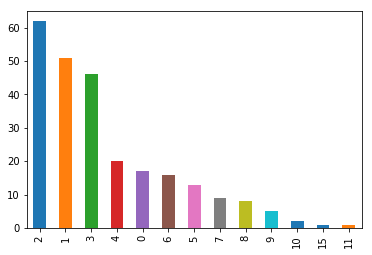

In [105]:
pd.Series(nb_terms_per_doc.ravel()).value_counts().plot(kind='bar')

In [106]:
idx = nb_terms_per_doc>0
tfidf_dtm_cropped = tfidf_dtm[nb_terms_per_doc>0,:]
Q4_corpus_fr_clean_cropped = [Q4_corpus_fr_clean[i] for i,x in enumerate(idx) if x]

In [107]:
doc_filter_2 = nb_terms_per_doc>0
assert(np.sum(doc_filter_2) == len(Q4_corpus_fr_clean_cropped))

In [108]:
print(tfidf_dtm.shape)
print(tfidf_dtm_cropped.shape)

(251, 133)
(234, 133)


In [109]:
print(len(Q4_corpus_fr_clean))
print(len(Q4_corpus_fr_clean_cropped))

251
234


In [110]:
# Show documents that were removed because they contain 0 vocabulary terms
[Q4_corpus_fr_clean[i] for i,x in enumerate(idx) if not x]

['',
 'codes étique',
 'regroup familia',
 'dominan euro',
 'évoluer plan académi',
 'iife standar',
 'every thing',
 '',
 '',
 'life',
 'avantag toute sorte',
 'vacance',
 '',
 'leflou',
 'prix voiture parfait ausi belle femme',
 'aventur',
 'socio economi']

## 5) Topic Modeling using LDA method
- **Input:** DTM matrix; corresponding vocabulary list; number of topics
- **Output:** LDA topics

We will try different number of topics and then choose the best number of topics based on visual inspection of the topic words and weights.

In [111]:
from sklearn.decomposition import LatentDirichletAllocation

In [112]:
dtm = tfidf_dtm_cropped
vocab = tfidf_vocab
Nb_Topics = 2 #We start by this one

In [113]:
# create instance of class
lda = LatentDirichletAllocation(n_components=Nb_Topics, learning_method='online', random_state=2019)

In [114]:
# call the fit() method of this class with the document-term matrix of our corpus.
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=2, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=2019, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

- The **fit**() method creates a KxN matrix in the ``model_components_`` data member, where K is number of topics and N is the number of vocabulary words.

- Every row in this matrix is a representation of a topic as a **weighted combination of words** (one weight value per vocabulary word)

In [115]:
# the sum of the rows of this matrix are not equal to 1
lda.components_.sum(axis=1)

array([270.04144045, 238.75398413])

In [116]:
assert(Nb_Topics == lda.components_.shape[0])
print(type(lda.components_))
print(lda.components_.shape)

<class 'numpy.ndarray'>
(2, 133)


In [117]:
# call transform() method obtain the matrix of document weights
lda_doc_weights = lda.transform(dtm)
lda_doc_weights

array([[0.18118683, 0.81881317],
       [0.77536662, 0.22463338],
       [0.25225917, 0.74774083],
       [0.21502556, 0.78497444],
       [0.72729906, 0.27270094],
       [0.30462449, 0.69537551],
       [0.22368428, 0.77631572],
       [0.30960315, 0.69039685],
       [0.80444488, 0.19555512],
       [0.28791868, 0.71208132],
       [0.60415267, 0.39584733],
       [0.20049935, 0.79950065],
       [0.20208129, 0.79791871],
       [0.7554903 , 0.2445097 ],
       [0.45903136, 0.54096864],
       [0.26540141, 0.73459859],
       [0.55158858, 0.44841142],
       [0.39512902, 0.60487098],
       [0.73282297, 0.26717703],
       [0.79813658, 0.20186342],
       [0.81432564, 0.18567436],
       [0.77924572, 0.22075428],
       [0.16138172, 0.83861828],
       [0.26540141, 0.73459859],
       [0.74746681, 0.25253319],
       [0.18606465, 0.81393535],
       [0.25260706, 0.74739294],
       [0.3431796 , 0.6568204 ],
       [0.58322628, 0.41677372],
       [0.19153088, 0.80846912],
       [0.

In [118]:
# every row in this matrix contains the weights of one document, one weight value per topic.
print(type(lda_doc_weights))
print(lda_doc_weights.shape)

<class 'numpy.ndarray'>
(234, 2)


In [119]:
# verify that the sum of each row = 1
lda_doc_weights.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [120]:
lda.components_

array([[ 0.57423655,  1.07660777,  2.10980165,  2.22831482,  0.99540735,
         0.70662719,  0.69867426,  2.12852141,  1.583853  ,  0.61437595,
         1.25312441,  0.7124135 ,  3.38038418,  0.71694724,  1.24015148,
         1.07188378,  0.83885177,  0.94828723,  0.58317875,  0.85325351,
         1.20328598,  0.77512802,  9.7801561 ,  2.20975989,  1.85877951,
         0.68409862,  3.27452589,  0.56052952,  0.6074806 ,  0.75876637,
         0.8629906 ,  1.50430802,  1.95055173,  0.70276405,  3.52037148,
         0.59348872,  1.85865109,  1.02695843,  1.12001358,  1.37930685,
         0.79552823,  0.72708882,  1.24314937,  1.71731738,  2.39391478,
         0.76740325,  0.67195936,  0.65396525,  2.00471186,  0.56797018,
         1.67612494,  0.91264235,  1.63566119,  0.58429149,  1.41365893,
         0.70099631,  1.61436437,  0.75724618,  0.61189025,  1.73452475,
        12.14288773,  3.14340916,  1.28327055,  7.18516117,  1.61277996,
         0.57327638,  0.74975305,  0.67165727,  0.5

### Understand and Interpret the Topics Weights
- Remember that ``lda.model_components_`` is a KxN matrix, where K is number of topics and N is the number of vocabulary words.
- Every row in this matrix is a representation of a topic as a **weighted combination of words** (one weight value per vocabulary word).
- We are going to analyze the values in this matrix to derive the meaning of each topic.

In [121]:
# select the first row of the lda.components_ matrix
x = lda.components_[0,:]
x

array([ 0.57423655,  1.07660777,  2.10980165,  2.22831482,  0.99540735,
        0.70662719,  0.69867426,  2.12852141,  1.583853  ,  0.61437595,
        1.25312441,  0.7124135 ,  3.38038418,  0.71694724,  1.24015148,
        1.07188378,  0.83885177,  0.94828723,  0.58317875,  0.85325351,
        1.20328598,  0.77512802,  9.7801561 ,  2.20975989,  1.85877951,
        0.68409862,  3.27452589,  0.56052952,  0.6074806 ,  0.75876637,
        0.8629906 ,  1.50430802,  1.95055173,  0.70276405,  3.52037148,
        0.59348872,  1.85865109,  1.02695843,  1.12001358,  1.37930685,
        0.79552823,  0.72708882,  1.24314937,  1.71731738,  2.39391478,
        0.76740325,  0.67195936,  0.65396525,  2.00471186,  0.56797018,
        1.67612494,  0.91264235,  1.63566119,  0.58429149,  1.41365893,
        0.70099631,  1.61436437,  0.75724618,  0.61189025,  1.73452475,
       12.14288773,  3.14340916,  1.28327055,  7.18516117,  1.61277996,
        0.57327638,  0.74975305,  0.67165727,  0.59225343, 10.06

In [122]:
#  x contains the word weights corresponding to the first topic.
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(133,)


In [123]:
N = 10

print("Top 10 words for each topic:")
print()

for i in range(Nb_Topics):
    topic_weights = lda.components_[i,:]
    print ("Topic %d: " % (i), end='')
    print (" ".join([vocab[j]
                    for j in topic_weights.argsort()[:-N - 1:-1]]))
print()

Top 10 words for each topic:

Topic 0: vie travail meilleu niveau conditi mode tunisie plus respect situati
Topic 1: salaire opportu expérie argent liberté manque profess respect faire mentali



In [124]:
# The top 10 words and their weights in each topic
for i in range(0,Nb_Topics):
    print()
    print("Topic",i)
    print(pd.DataFrame(dict(term=vocab, topic_weight= lda.components_[i,:])).sort_values("topic_weight", ascending=False).head(10))


Topic 0
        term  topic_weight
122      vie     21.562997
117  travail     20.830561
60   meilleu     12.142888
69    niveau     10.062807
22   conditi      9.780156
63      mode      7.185161
120  tunisie      7.047898
79      plus      7.025544
95   respect      4.945816
104  situati      4.115704

Topic 1
       term  topic_weight
98  salaire     16.359467
75  opportu     13.040797
40  expérie      9.414779
6    argent      8.486397
55  liberté      5.038643
57   manque      4.696565
86  profess      4.600871
95  respect      4.140027
41    faire      3.631782
61  mentali      3.608431


#### Visualize topics as word clouds

A *WordCloud* is a graphic technique to display words such that word size is proportional to the importance of the word.

In [125]:
# Start with loading all necessary libraries
# from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [126]:
Max_Words = 30

In [127]:
# Create instane of class with default configuration parameters
wc = WordCloud(width = 1000, height = 500, min_font_size=4, max_words=Max_Words)

Topic 0


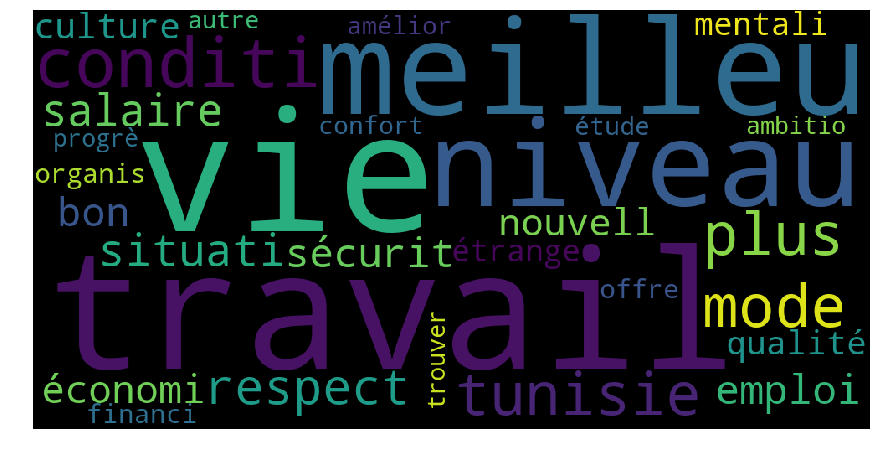

Topic 1


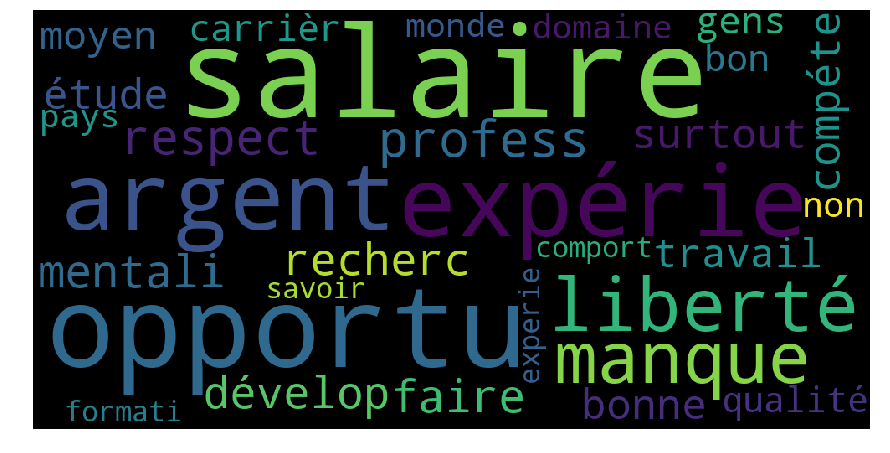

In [128]:
# generate a word cloud image by calling the generate_from_frequencies() method

# set maximum font size
MaxFont = 200

for i in range(Nb_Topics):
    print("Topic",i)
    # set the max font size for this topic
    weighted_MF = int( MaxFont * np.max(lda.components_[i,:]) / np.max(lda.components_) )
    d = dict(zip(vocab, lda.components_[i,:]))
    z = wc.generate_from_frequencies(d, max_font_size=weighted_MF)
    plt.figure(figsize=(15,8))
    plt.imshow(z)
    plt.axis("off")
    plt.show()
    # save to an image file
    # plt.savefig('topic.png', bbox_inches='tight')

### Naming the Topics
After careful study of the above results, we are now finally ready to give each topic a *name*, basically a *short phrase* that reflects the global **meaning** of the words with highest weight values in that topic.
However, that seems that having k= 2 is not a good configuration as topics displayed above look identical so we will change k.

### Change k

**In this part, we try another number of topics.**

In [129]:
dtm = tfidf_dtm_cropped
vocab = tfidf_vocab
Nb_Topics = 3

In [130]:
# create instance of class
lda = LatentDirichletAllocation(n_components=Nb_Topics, learning_method='online', random_state=2019)

In [131]:
# call the fit() method of this class with the document-term matrix of our corpus.
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=3, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=2019, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [132]:
assert(Nb_Topics == lda.components_.shape[0])
print(type(lda.components_))
print(lda.components_.shape)

<class 'numpy.ndarray'>
(3, 133)


In [133]:
# call transform() method obtain the matrix of document weights
lda_doc_weights = lda.transform(dtm)
lda_doc_weights

array([[0.11764278, 0.75696586, 0.12539136],
       [0.71810811, 0.14050687, 0.14138501],
       [0.16696573, 0.66614022, 0.16689405],
       [0.14146329, 0.68527605, 0.17326066],
       [0.10706823, 0.10642721, 0.78650456],
       [0.17848332, 0.12846545, 0.69305123],
       [0.14113747, 0.71429842, 0.14456411],
       [0.10473974, 0.13028679, 0.76497347],
       [0.7473702 , 0.12635043, 0.12627937],
       [0.13266017, 0.74340493, 0.12393489],
       [0.12280013, 0.1224654 , 0.75473447],
       [0.10658014, 0.29371785, 0.59970201],
       [0.12454452, 0.13075665, 0.74469883],
       [0.66753605, 0.14281902, 0.18964493],
       [0.13892499, 0.13891366, 0.72216135],
       [0.17195934, 0.65946014, 0.16858052],
       [0.10697394, 0.49877372, 0.39425234],
       [0.14371609, 0.14362702, 0.71265689],
       [0.14610219, 0.31169349, 0.54220432],
       [0.7706209 , 0.11396237, 0.11541673],
       [0.28639627, 0.11379327, 0.59981047],
       [0.71949141, 0.13878388, 0.14172472],
       [0.

In [134]:
# every row in this matrix contains the weights of one document, one weight value per topic.
print(type(lda_doc_weights))
print(lda_doc_weights.shape)

<class 'numpy.ndarray'>
(234, 3)


In [135]:
lda.components_

array([[ 0.38194745,  0.9512918 ,  1.95504563,  1.95587328,  0.38907064,
         0.39785404,  0.43476284,  2.01559158,  1.47413868,  0.40888072,
         0.42174369,  0.38536485,  1.96887357,  0.42389301,  0.3921208 ,
         0.44223281,  0.45802937,  0.38567567,  0.38122751,  0.40663236,
         0.3807287 ,  0.76677026,  8.97495921,  0.40395313,  1.75305267,
         0.38117498,  3.16206874,  0.37831783,  0.39167974,  0.61286975,
         0.6883878 ,  1.21260407,  1.70515545,  0.41822176,  0.67463386,
         0.38449453,  0.39848956,  0.8038124 ,  0.90342907,  1.2583623 ,
         0.51703454,  0.51645621,  0.39126932,  1.57887143,  1.87567066,
         0.58672507,  0.49825611,  0.37984936,  0.54929272,  0.38811096,
         1.21017044,  0.5371652 ,  0.38408735,  0.38247307,  0.51726231,
         0.38035032,  1.18764107,  0.3818541 ,  0.40489345,  0.38962324,
         8.13584728,  1.23084367,  0.41105868,  7.15839123,  1.49702966,
         0.37805471,  0.39485228,  0.47148365,  0.3

### Understand and Interpret the Topics Weights

In [136]:
# select the first row of the lda.components_ matrix
x = lda.components_[0,:]
x

array([ 0.38194745,  0.9512918 ,  1.95504563,  1.95587328,  0.38907064,
        0.39785404,  0.43476284,  2.01559158,  1.47413868,  0.40888072,
        0.42174369,  0.38536485,  1.96887357,  0.42389301,  0.3921208 ,
        0.44223281,  0.45802937,  0.38567567,  0.38122751,  0.40663236,
        0.3807287 ,  0.76677026,  8.97495921,  0.40395313,  1.75305267,
        0.38117498,  3.16206874,  0.37831783,  0.39167974,  0.61286975,
        0.6883878 ,  1.21260407,  1.70515545,  0.41822176,  0.67463386,
        0.38449453,  0.39848956,  0.8038124 ,  0.90342907,  1.2583623 ,
        0.51703454,  0.51645621,  0.39126932,  1.57887143,  1.87567066,
        0.58672507,  0.49825611,  0.37984936,  0.54929272,  0.38811096,
        1.21017044,  0.5371652 ,  0.38408735,  0.38247307,  0.51726231,
        0.38035032,  1.18764107,  0.3818541 ,  0.40489345,  0.38962324,
        8.13584728,  1.23084367,  0.41105868,  7.15839123,  1.49702966,
        0.37805471,  0.39485228,  0.47148365,  0.37710625,  9.96

In [137]:
#  x contains the word weights corresponding to the first topic.
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(133,)


In [138]:
# The top 10 words and their weights in each topic
for i in range(0,Nb_Topics):
    print()
    print("Topic",i)
    print(pd.DataFrame(dict(term=vocab, topic_weight= lda.components_[i,:])).sort_values("topic_weight", ascending=False).head(10))


Topic 0
        term  topic_weight
122      vie     20.761320
69    niveau      9.968753
22   conditi      8.974959
60   meilleu      8.135847
63      mode      7.158391
98   salaire      3.383311
26   culture      3.162069
72   nouvell      2.845824
76   organis      2.521180
131    étude      2.515684

Topic 1
        term  topic_weight
98   salaire     15.131803
6     argent      8.381624
55   liberté      4.994256
86   profess      4.392603
61   mentali      4.052737
12       bon      3.494269
40   expérie      3.438086
33   dévelop      3.377124
110  surtout      3.011135
41     faire      2.889529

Topic 2
        term  topic_weight
117  travail     21.468516
75   opportu     13.931893
120  tunisie      8.088245
79      plus      7.226478
40   expérie      6.326370
95   respect      6.032796
90   qualité      4.931890
57    manque      4.658269
60   meilleu      4.462322
92   recherc      4.287534


In [139]:
N = 10

print("Top 10 words for each topic:")
print()

for i in range(Nb_Topics):
    topic_weights = lda.components_[i,:]
    print ("Topic %d: " % (i), end='')
    print (" ".join([vocab[j]
                    for j in topic_weights.argsort()[:-N - 1:-1]]))
print()

Top 10 words for each topic:

Topic 0: vie niveau conditi meilleu mode salaire culture nouvell organis étude
Topic 1: salaire argent liberté profess mentali bon expérie dévelop surtout faire
Topic 2: travail opportu tunisie plus expérie respect qualité manque meilleu recherc



#### Visualize topics as word clouds

In [140]:
Max_Words = 30

In [141]:
# Create instane of class with default configuration parameters
wc = WordCloud(width = 1000, height = 500, min_font_size=4, max_words=Max_Words)

Topic 0


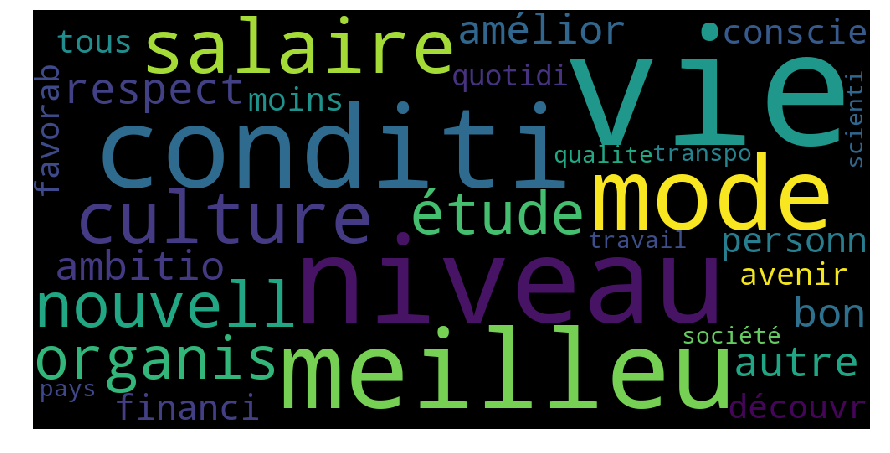

Topic 1


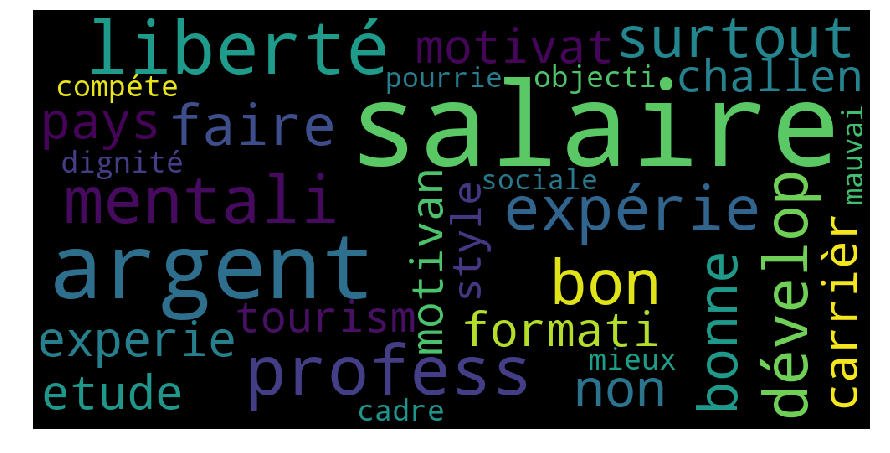

Topic 2


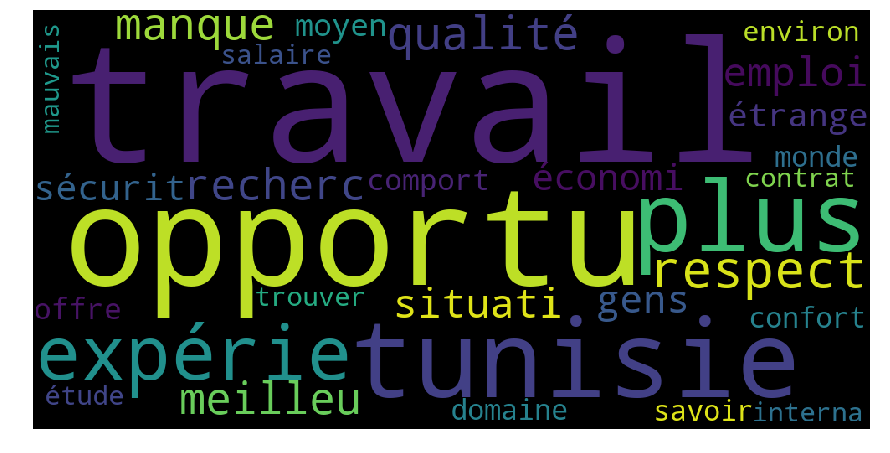

In [142]:
# generate a word cloud image by calling the generate_from_frequencies() method

# set maximum font size
MaxFont = 200

for i in range(Nb_Topics):
    print("Topic",i)
    # set the max font size for this topic
    weighted_MF = int( MaxFont * np.max(lda.components_[i,:]) / np.max(lda.components_) )
    d = dict(zip(vocab, lda.components_[i,:]))
    z = wc.generate_from_frequencies(d, max_font_size=weighted_MF)
    plt.figure(figsize=(15,8))
    plt.imshow(z)
    plt.axis("off")
    plt.show()
    # save to an image file
    # plt.savefig('topic.png', bbox_inches='tight')

### Naming the Topics

In [145]:
# THE LIST BELOW SHOULD CONTAIN A MEANINGFUL NAME OF EACH TOPIC
topic_names = []
topic_names = ['Respect of their competences', 'Better salary and better opportunities', 'Better life style']

### Understand and Interpret Document Weights
- Remember that ``lda_doc_weights`` is a MxK matrix where M is the number of documents and K is the number of topics. 

- Every row in this matrix contains a representation of one document as a weighted combination of topics.

In [146]:
lda_doc_weights.shape

(234, 3)

#### Visualize documents as points in topic space

Text(0,0.5,'topic 1')

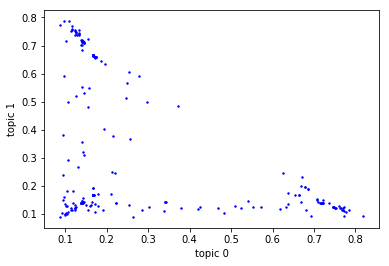

In [147]:
plt.scatter(lda_doc_weights[:,0],lda_doc_weights[:,1],s=2, marker="o",color='blue')
plt.xlabel('topic 0')
plt.ylabel('topic 1')

Text(0,0.5,'topic 2')

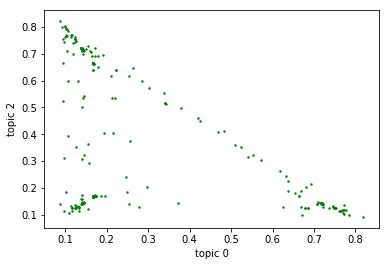

In [148]:
plt.scatter(lda_doc_weights[:,0],lda_doc_weights[:,2],s=2, marker="o",color='green')
plt.xlabel('topic 0')
plt.ylabel('topic 2')

#### Visualize dominant topic of documents
We define the 'dominant' topic of a document as the topic with the largest weight value for that document.

In [149]:
dom_topic_weights = pd.Series(np.max(lda_doc_weights,axis=1))
dom_topic_labels = pd.Series(np.argmax(lda_doc_weights,axis=1))

In [150]:
dom_topic_labels.value_counts()

2    100
1     73
0     61
dtype: int64

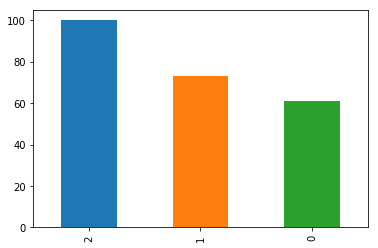

In [151]:
dom_topic_labels.value_counts().plot(kind='bar')

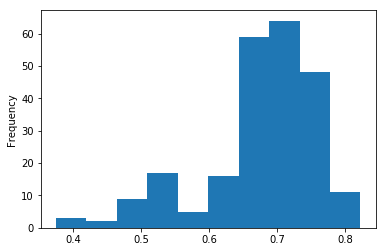

In [152]:
dom_topic_weights.plot(kind='hist')

In [153]:
dom_topic_weights.describe()

count    234.000000
mean       0.676942
std        0.084791
min        0.375209
25%        0.659174
50%        0.698368
75%        0.734225
max        0.822086
dtype: float64

In [154]:
np.sum((dom_topic_weights>.66) & (dom_topic_weights<.67))

38

In [155]:
# How many documents have a clearly dominant topic?
np.sum(dom_topic_weights>=0.666)

137

In [156]:
# How many documents do not have a clearly dominant topic
np.sum(dom_topic_weights<=0.5)

12

In [157]:
# Which documents do not have a clearly dominant topic
for i,x in enumerate(dom_topic_weights):
    if x<=0.5:
        print(lda_doc_weights[i,:],Q4_corpus_fr_clean_cropped[i])

[0.10697394 0.49877372 0.39425234] situati économi politiq non stable pays corrupt
[0.2973425  0.49854945 0.20410804] mode vie opportu faire bonne carrièr
[0.42157891 0.11690311 0.46151798] environ travail qualite vie
[0.21594225 0.37888867 0.40516908] salaire très motivan désir découvr étrange
[0.19281701 0.40376745 0.40341554] bonne conditi travail bon salaire bons comport collègu travail
[0.37292576 0.48482366 0.14225058] conditi pourrie
[0.46912958 0.12321768 0.40765275] meilleu opportu paye vie
[0.25638348 0.3684074  0.37520911] mauvai conditi travail ressemb esclava salaire bas manque conscie gens
[0.42574401 0.12451057 0.44974543] espoir meilleu qualité vie
[0.15539271 0.48074803 0.36385926] bon travail
[0.37872225 0.12252254 0.49875522] conditi travail sécurit vie sociale
[0.4835531  0.10340282 0.41304407] mode niveau vie mentali opportu travail donner importa recherc scienti


### Label each document with corresponding dominant topic
Based on the above information about dominant topic, we are now ready to add a new column to our database; this column contains a categorization of Q4 answers to 3 categories.

In [158]:
df.shape

(258, 16)

In [159]:
# create a new column and initialize all its elements to 'Unknown'
df['Q4_category'] = "Unknown"

In [160]:
len(doc_filter_1),len(doc_filter_2),len(dom_topic_labels)

(258, 251, 234)

In [161]:
j = 0
k = 0
for i in range(df.shape[0]):
    if doc_filter_1[i]:
        if doc_filter_2[j]:
            df.loc[i,'Q4_category'] = topic_names[dom_topic_labels[k]]
            k=k+1
        j=j+1

In [162]:
np.sum(doc_filter_1),j

(251, 251)

In [163]:
np.sum(doc_filter_2),k

(234, 234)

In [164]:
df['Q4_category']

0      Better salary and better opportunities
1                Respect of their competences
2      Better salary and better opportunities
3      Better salary and better opportunities
4                           Better life style
5                           Better life style
6      Better salary and better opportunities
7                           Better life style
8                Respect of their competences
9      Better salary and better opportunities
10                          Better life style
11                                    Unknown
12                          Better life style
13                                    Unknown
14                                    Unknown
15                          Better life style
16               Respect of their competences
17                          Better life style
18     Better salary and better opportunities
19     Better salary and better opportunities
20                          Better life style
21                          Better

In [165]:
df['Q4_category'].value_counts()

Better life style                         100
Better salary and better opportunities     73
Respect of their competences               61
Unknown                                    24
Name: Q4_category, dtype: int64

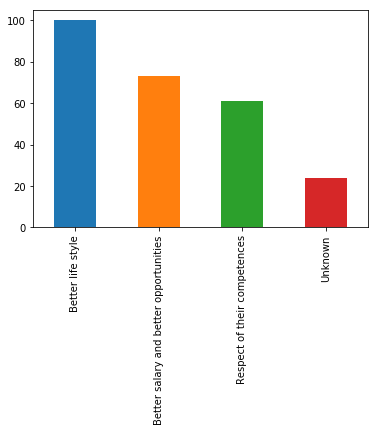

In [166]:
df['Q4_category'].value_counts().plot(kind='bar')

*****

## 6) Clustering
- In this part, we will show that topic modeling is actually more useful than clustering in understanding the content of our documents.

In [167]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [168]:
dtm = tfidf_dtm_cropped

### a) Using BOW feature vectors
Here we use the rows of the DTM matrix as the feature vectors for clustering.

In [169]:
# create instance of KMeans class
km = KMeans(n_clusters=2, random_state=10)

# run kMeans algorithm
km.fit(dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [170]:
# Determine the value of SSD (Sum of Squared Distances)
km.inertia_

208.16566012812999

In [171]:
# Number of documents in each cluster
pd.Series(km.labels_).value_counts()

0    208
1     26
dtype: int64

### Elbow method
Use the 'elbow' method in order to find best number of clusters.

In [172]:
K_values = range(1,11)
Sum_of_squared_distances = []   # initialize empty list to store SSD values
for k in K_values:  # be careful, k not K
    km = KMeans(n_clusters=k, random_state=10)   # create instance of KMeans class
    km.fit(dtm)  # run kMeans algorithm
    Sum_of_squared_distances.append(km.inertia_)

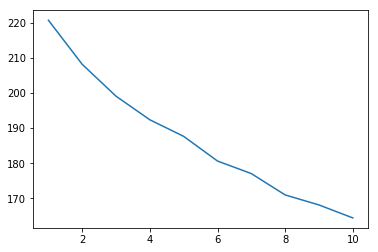

In [173]:
# plot the SSD curve
plt.plot(K_values,Sum_of_squared_distances)
#plt.ylim([0, 200])

### b) Using LDA weights
Here we use the rows of the doc_weights matrix as the feature vectors for clustering.

In [174]:
# create instance of KMeans class
km2 = KMeans(n_clusters=2, random_state=10)

# run kMeans algorithm
km2.fit(lda_doc_weights)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [175]:
# Determine the value of SSD (Sum of Squared Distances)
km2.inertia_

22.159539036776067

In [176]:
# Number of documents in each cluster
pd.Series(km2.labels_).value_counts()

0    135
1     99
dtype: int64

### Elbow method
Use the 'elbow' method in order to find best number of clusters.

In [177]:
K_values = range(1,11)
Sum_of_squared_distances2 = []
for k in K_values:
    km_ = KMeans(n_clusters=k, random_state=6724)   # create instance of KMeans class
    km_.fit(lda_doc_weights)
    Sum_of_squared_distances2.append(km_.inertia_)

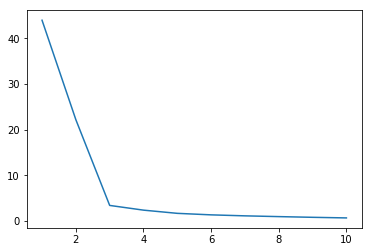

In [178]:
# plot the SSD curve
plt.plot(K_values,Sum_of_squared_distances2)
#plt.ylim([0, 50])

## 7) Predictive Modeling
We would like to extract a predictive model of the form: ``Q4_category = f(other non-text attributes)`` which will help us understand how the answers vary based on the characteristics of the respondent. Obviously, this is a **classification** problem.

### a) Data Preparation

In [179]:
df2 = df.copy()

In [180]:
df2.columns[1:9] # predictor variables

Index(['Votre âge', 'Sexe', 'Etat civil', 'Niveau d'étude',
       'Etablissement d'études', 'Situation professionnelle', 'Région',
       'Domaine d'études'],
      dtype='object')

In [181]:
df2.dtypes[1:9]

Votre âge                    object
Sexe                         object
Etat civil                   object
Niveau d'étude               object
Etablissement d'études       object
Situation professionnelle    object
Région                       object
Domaine d'études             object
dtype: object

In [182]:
df2.iloc[:,1:9].head()

,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études
0,20-25,Femme,Célibataire,Ingénieur,INSAT,Etudiant,Grand Tunis,Sciences de l'Ingénieur
1,20-25,Homme,Célibataire,Ingénieur,ENIT,Etudiant,Grand Tunis,Sciences de l'Ingénieur
2,26-30,Femme,Célibataire,Mastère,ESAD,Fonctionnaire,Grand Tunis,Artistique
3,31 et plus,Homme,Marié,Licence,FST,Fonctionnaire,Grand Tunis,Sciences de l'Ingénieur
4,20-25,Femme,Célibataire,Mastère,Faculté des Sciences Humaines et Sociales de T...,Fonctionnaire,Grand Tunis,Sciences humaines et sociales


In [183]:
# verify the number of distinct values in each predictor attribute
df2.iloc[:,1:9].nunique(axis=0)

Votre âge                     3
Sexe                          2
Etat civil                    2
Niveau d'étude                3
Etablissement d'études       82
Situation professionnelle     3
Région                        4
Domaine d'études             44
dtype: int64

In [184]:
df2['Votre âge'].value_counts()

20-25         208
26-30          34
31 et plus     16
Name: Votre âge, dtype: int64

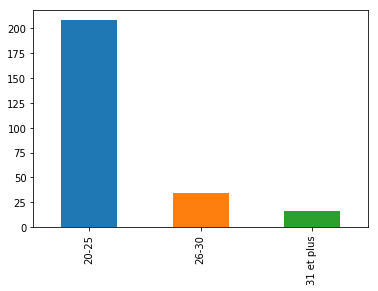

In [185]:
df2['Votre âge'].value_counts().plot(kind='bar')

In [186]:
df2['Sexe'].value_counts()

Femme    131
Homme    127
Name: Sexe, dtype: int64

In [187]:
df2['Etat civil'].value_counts()

Célibataire    234
Marié           23
Name: Etat civil, dtype: int64

In [188]:
df2['Niveau d\'étude'].value_counts()

Ingénieur    173
Licence       48
Mastère       37
Name: Niveau d'étude, dtype: int64

In [189]:
df2['Région'].value_counts()

Grand Tunis    175
Autre           62
Sfax            12
Sousse           9
Name: Région, dtype: int64

In [190]:
# The "Etablissement d'études" attribute also has too many distinct values!
df2['Etablissement d\'études'].value_counts()

INSAT                                                 86
ENIT                                                  38
FST                                                   14
ESSAI                                                 11
ESPRIT                                                 6
ENSI                                                   6
ISSHT                                                  5
Issht                                                  3
Esprit                                                 3
ENSIT                                                  3
Sup'Com                                                3
ISI                                                    3
INAT                                                   3
FSB                                                    2
ULT                                                    2
ISG                                                    2
ESSECT                                                 2
ENIM                           

In [191]:
# Let's reduce the number of values of the "Etablissement d'études" attribute
df2.loc[~df2['Etablissement d\'études'].isin(['INSAT', 'ENIT','FST','ESSAI']),'Etablissement d\'études'] = 'Other'
df2['Etablissement d\'études'].value_counts()

Other    109
INSAT     86
ENIT      38
FST       14
ESSAI     11
Name: Etablissement d'études, dtype: int64

In [192]:
# The "Domaine d'études" attribute also has too many distinct values!
df2['Domaine d\'études'].value_counts()

Sciences de l'Ingénieur                        181
Sciences humaines et sociales                   14
Economie et gestion                             12
Médecine                                         5
Informatique                                     4
Pharmacie                                        2
Biologie industrielle                            2
Réseaux informatiques et télécommunications      2
Droit                                            1
Informatique(développement)                      1
biologie medical                                 1
informatique                                     1
Informatique industrielle                        1
Architecture                                     1
Génie énergétique                                1
mathématique appliquée                           1
Kinésithérapie                                   1
Agronomie                                        1
Science informatique                             1
Systèmes, signaux et données.  

In [193]:
# We find that it would be better to reduce the number of distinct values to 5 instead of only 2. 
df2.loc[~df2['Domaine d\'études'].isin(['Sciences de l\'Ingénieur', 'Sciences humaines et sociales','Economie et gestion ','Médecine','Informatique']),'Domaine d\'études'] = 'Other'

In [194]:
# verify the number of distinct values in each predictor attribute
df2.iloc[:,1:9].nunique(axis=0)

Votre âge                    3
Sexe                         2
Etat civil                   2
Niveau d'étude               3
Etablissement d'études       5
Situation professionnelle    3
Région                       4
Domaine d'études             5
dtype: int64

In [195]:
df2['Domaine d\'études'].value_counts()

Sciences de l'Ingénieur          181
Other                             54
Sciences humaines et sociales     14
Médecine                           5
Informatique                       4
Name: Domaine d'études, dtype: int64

### b) Pattern Extraction (modeling)

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [197]:
df2.dtypes[1:9]

Votre âge                    object
Sexe                         object
Etat civil                   object
Niveau d'étude               object
Etablissement d'études       object
Situation professionnelle    object
Région                       object
Domaine d'études             object
dtype: object

In python, library “sklearn” requires features in numerical arrays. Therefore
we resort to **Label Encoder** which is used to transform non-numerical labels to numerical labels (or nominal categorical variables). We create a class named **MultiColumLabelEncoder** that responds to the fit(), transform(), and fit_transform() so that we may indicate which columns we want exactly to transform.

In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [199]:
df2=MultiColumnLabelEncoder(columns = ['Votre âge','Sexe','Etat civil','Niveau d\'étude','Etablissement d\'études','Situation professionnelle','Région','Domaine d\'études','Q4_category']).fit_transform(df2.astype(str))

In [200]:
df2.head()

,Timestamp,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,"Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire ""autre"" si vous ne l'avez pas)",Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?,Q2 : Quel salaire vous fera rester en Tunisie ?,Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?,Q4_category
0,10/30/2018 18:57:24,0,0,0,0,3,0,1,3,student's order in the official list of TICV s...,"mes études, ma famille et mon entourage",2000,le tourisme,la volonté de faire de l'expérience et de fair...,A l'étranger on trouve plus de respect.,A l'étranger ils payent plus et ils sont plus ...,1
1,10/30/2018 22:33:57,0,1,0,0,0,0,1,3,Autre,Rien,2000,Réputation,Niveau de conscience populaire,La valeur d homme,Recherche,2
2,10/31/2018 10:25:17,1,0,0,2,4,1,1,2,22,La mentalité,2000 dinars,la sécurité,l'argent,la tolérance,la motivation,1
3,10/31/2018 10:28:55,2,1,1,1,2,1,1,3,22,Qualité de vie,3500,"Pour un investisseur, la rémunération des empl...",L'expérience + le salaire,La mentalité sur le niveau professionnel et so...,"À l'étranger, les expériences sont plus intere...",1
4,10/31/2018 10:29:24,0,0,0,2,4,1,1,4,22,Une bonne ambiance de travail,2000 dinars,"Les bonnes conditions climatiques, la convivia...",Des fourchettes salariales plus importantes et...,Une meilleure parité en matière de compétence,"T es payé pour ta compétence, les plafonds de ...",0


In [201]:
from sklearn.model_selection import train_test_split

In [202]:
df3= df2.iloc[:,[1,2,3,4,5,6,7,8,16]]
df3.head()

,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,Q4_category
0,0,0,0,0,3,0,1,3,1
1,0,1,0,0,0,0,1,3,2
2,1,0,0,2,4,1,1,2,1
3,2,1,1,1,2,1,1,3,1
4,0,0,0,2,4,1,1,4,0


In [203]:
target = df3['Q4_category'].values 

In [204]:
X_train, X_test, y_train, y_test = train_test_split(df3, target, test_size=0.3)

In [205]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180, 9) (180,)
(78, 9) (78,)


In [206]:
# Train the model
# # all parameters not specified are set to their defaults, only the default solver "liblinear" is incredibly 
#slow thats why we change it
logRegr = LogisticRegression(solver = 'lbfgs')
model = logRegr.fit(X_train,y_train)
predictions = logRegr.predict(X_test)
predictions

array([0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 3, 2, 0, 0, 3, 1, 1, 0,
       0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 3, 0, 2, 2,
       0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 3, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0], dtype=int64)

Text(0,0.5,'Predictions')

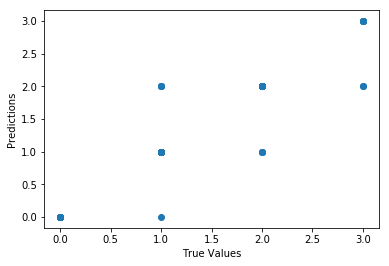

In [207]:
# Let's plot the model
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [208]:
# And print the accuracy score: 
print("Score:", model.score(X_test, y_test))

Score: 0.8846153846153846


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, we are showing a confusion matrice of our model being more understandable and visually appealing.

In [209]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

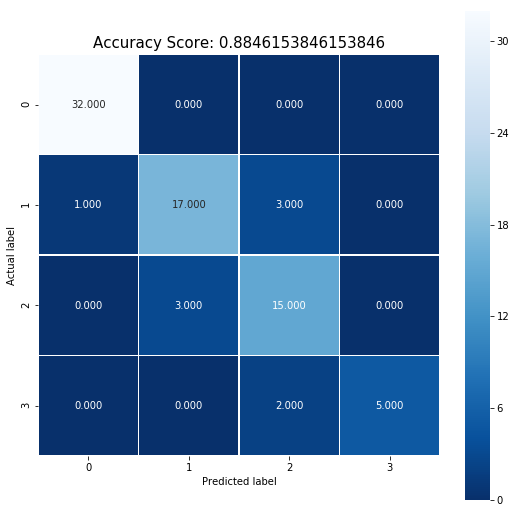

In [210]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

We can deduce that our model is well performed as we obtain a high value of the score.

Here is a summary of what we did : We've split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data.

In [211]:
# display the parameters of the model
print(logRegr.coef_)

[[-0.15122009  0.15628189 -0.10980963 -0.02007872  0.13937469 -0.03839053
  -0.193252    0.18233197 -4.79546872]
 [ 0.3245389  -0.22180102  0.65023724  0.02775545 -0.21298562  0.06246395
   0.27237991 -0.57442629 -0.01914718]
 [-0.2118592  -0.43184451 -0.3531388   0.51633718 -0.11401925 -0.11699557
   0.32358412  0.43741391  1.45199436]
 [-0.09918775  0.28280362 -0.09830458 -0.57763212  0.14189692 -0.00969464
  -0.19006053 -0.06840176  3.57374979]]


In our case, we have a multi class problem. Therefore you have as much coef_ arrays as classifiers. There are 4 arrays as displayed above.

## 8) Visualization and interpretation of results
- A picture is worth a thousand words! Therefore, we will rovide some graphic plots that highlight the relationship between Q4_catgory and other attributes.

In [212]:
import seaborn as sns # It's a library for visualization
sns.set(style="darkgrid")

In [213]:
df.head()

,Timestamp,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,"Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire ""autre"" si vous ne l'avez pas)",Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?,Q2 : Quel salaire vous fera rester en Tunisie ?,Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?,Q4_category
0,10/30/2018 18:57:24,20-25,Femme,Célibataire,Ingénieur,INSAT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,student's order in the official list of TICV s...,"mes études, ma famille et mon entourage",2000,le tourisme,la volonté de faire de l'expérience et de fair...,A l'étranger on trouve plus de respect.,A l'étranger ils payent plus et ils sont plus ...,Better salary and better opportunities
1,10/30/2018 22:33:57,20-25,Homme,Célibataire,Ingénieur,ENIT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,Autre,Rien,2000,Réputation,Niveau de conscience populaire,La valeur d homme,Recherche,Respect of their competences
2,10/31/2018 10:25:17,26-30,Femme,Célibataire,Mastère,ESAD,Fonctionnaire,Grand Tunis,Artistique,22,La mentalité,2000 dinars,la sécurité,l'argent,la tolérance,la motivation,Better salary and better opportunities
3,10/31/2018 10:28:55,31 et plus,Homme,Marié,Licence,FST,Fonctionnaire,Grand Tunis,Sciences de l'Ingénieur,22,Qualité de vie,3500,"Pour un investisseur, la rémunération des empl...",L'expérience + le salaire,La mentalité sur le niveau professionnel et so...,"À l'étranger, les expériences sont plus intere...",Better salary and better opportunities
4,10/31/2018 10:29:24,20-25,Femme,Célibataire,Mastère,Faculté des Sciences Humaines et Sociales de T...,Fonctionnaire,Grand Tunis,Sciences humaines et sociales,22,Une bonne ambiance de travail,2000 dinars,"Les bonnes conditions climatiques, la convivia...",Des fourchettes salariales plus importantes et...,Une meilleure parité en matière de compétence,"T es payé pour ta compétence, les plafonds de ...",Better life style


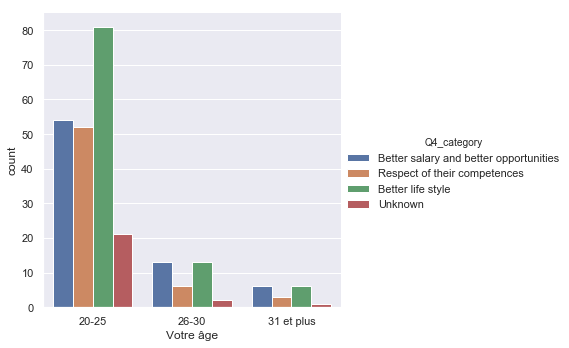

In [214]:
sns.catplot(x="Votre âge", hue="Q4_category", kind="count", data=df)

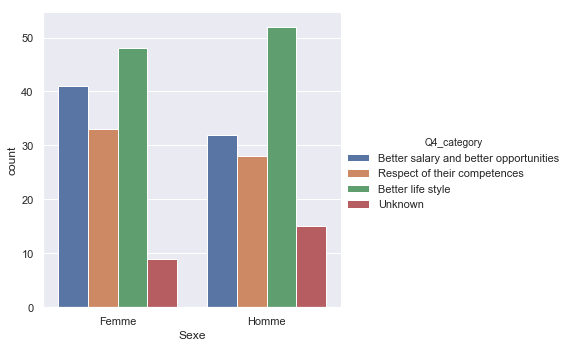

In [215]:
sns.catplot(x="Sexe", hue="Q4_category", kind="count", data=df)

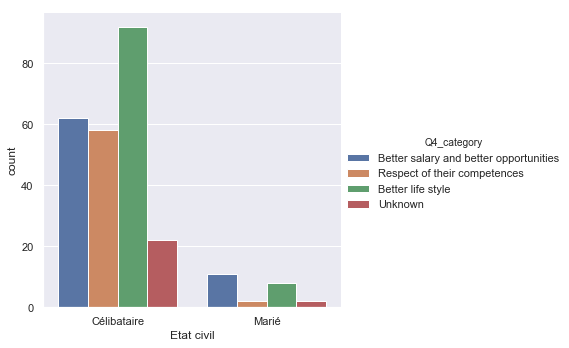

In [216]:
sns.catplot(x="Etat civil", hue="Q4_category", kind="count", data=df)

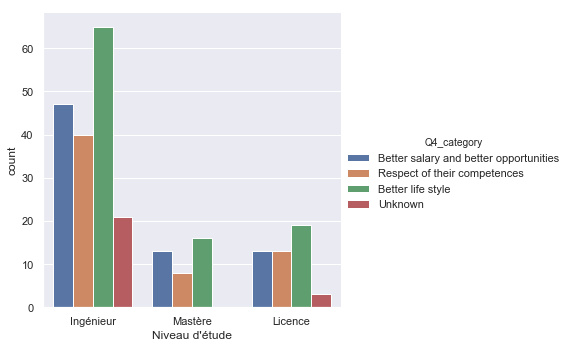

In [217]:
sns.catplot(x="Niveau d\'étude", hue="Q4_category", kind="count", data=df)

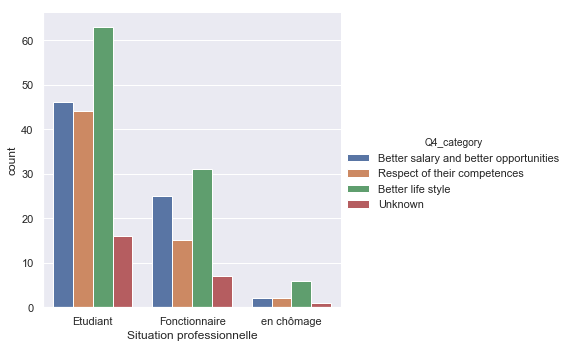

In [218]:
sns.catplot(x="Situation professionnelle", hue="Q4_category", kind="count", data=df)

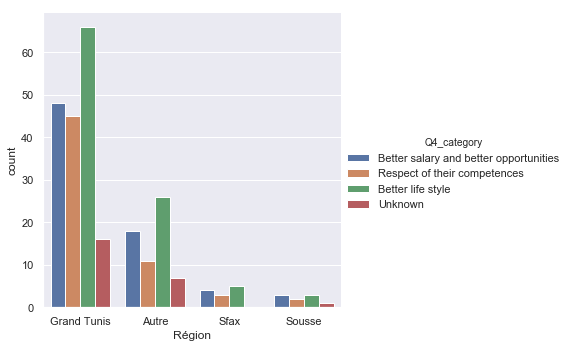

In [219]:
sns.catplot(x="Région", hue="Q4_category", kind="count", data=df)